### SEISMICITY IN THE GAP OF TEHUANTEPEC AND ANALYSIS OF EARTHQUAKE OF TEHUANTEPEC


**2021/09/30**

**by Cristian Alberto Juarez Valle**

**cristian.jv653@gmail.com**


The gap of tehuactepec has an intesity seismic activity therefore is located in a subduction zozne. Where two tectonic plates converge and are generally dominated by a big quantity of seismic events and by large trhust earthquakes. 

In this particulary subduction zone we found that the Cocos plate subducts beneath Oaxaca with a rate of ~6.3 cm/year. 

<img src=https://www.moonlightair.org/uploads/2/6/1/0/26106744/21752113-1965987766993482-7484555549627149190-n_orig.png>

In this project, we're going to review seismic events over time in particular for this segment of the convergence zone, where big earthquakes have been recorded. 


We limited our research to the next parameters:

**Latitude:** 14° N to 18° N

**Longitude:** -96 E to -94 E

All the data was provided by:


* **IRIS DMC FDSNWS event Web Service**

Data Management Center (DMC) of the Incorporated Research Institutions for Seismology (IRIS)

* **SSN-UNAM**

Mexican Seismological Service. (2021). Earthquake Catalog. Retrieved from http://www2.ssn.unam.mx:8080/catalogo/

#### Importing libraries

In [11]:
# Loadding necessary libraries
import math
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from obspy import UTCDateTime
from obspy.clients.fdsn.header import URL_MAPPINGS
from obspy.clients.fdsn import Client
import matplotlib.dates as mdates 
import pygmt
import datetime
import os
client = Client("IRIS")
import matplotlib.dates as mdates

In [7]:
df = pd.read_csv("sismos.csv")
df.head()

,Date,Magnitude,Latitude,Longitude,Deth
0,1910-09-24,6.9,16.77,-95.90,80.0
1,1911-08-27,6.7,17.00,-96.00,100.0
2,1916-06-02,7.0,17.50,-95.00,150.0
3,1942-11-12,6.7,17.25,-94.25,90.0
4,1946-06-07,6.5,16.50,-94.00,100.0


In [3]:
#we transform the format of the date column to only years
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

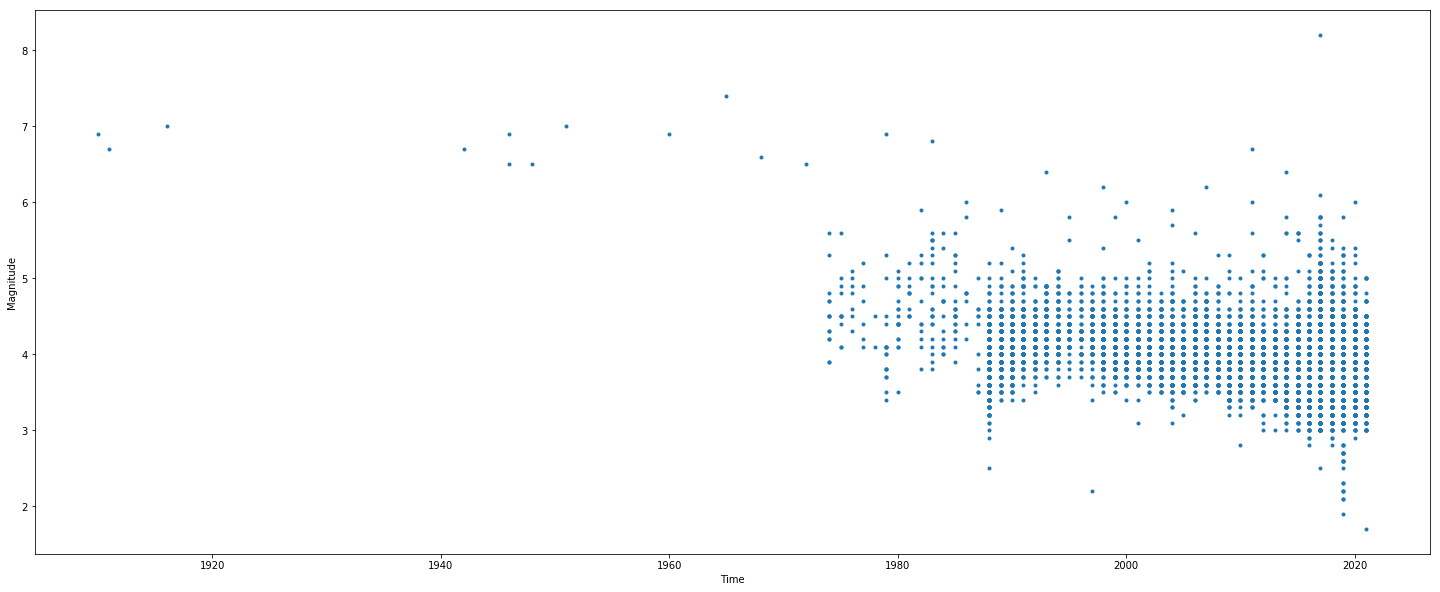

In [4]:
fig = plt.figure()
fig.set_size_inches(25, 10)
plt.plot(df.Year, df.Magnitude, ".");
plt.ylabel("Magnitude");
plt.xlabel("Time")
plt.show()

In this firts display we can apreciate that the majority of events of this catalogue are after 1980 should the number of seimograms implementated 

### Gap of tehuantepec earthquakes

We are going to make a plot that shows all earthquakes in the catalog inside the gap of tehuantepec.

In [9]:
# Set the region for the plot to be slightly larger than the data bounds.
region = [
    df.Longitude.min() - 1,
    df.Longitude.max() + 1,
    df.Latitude.min() - 1,
    df.Latitude.max() + 1,
]

print(region)

[-97.0, -93.0, 13.0055, 19.0]


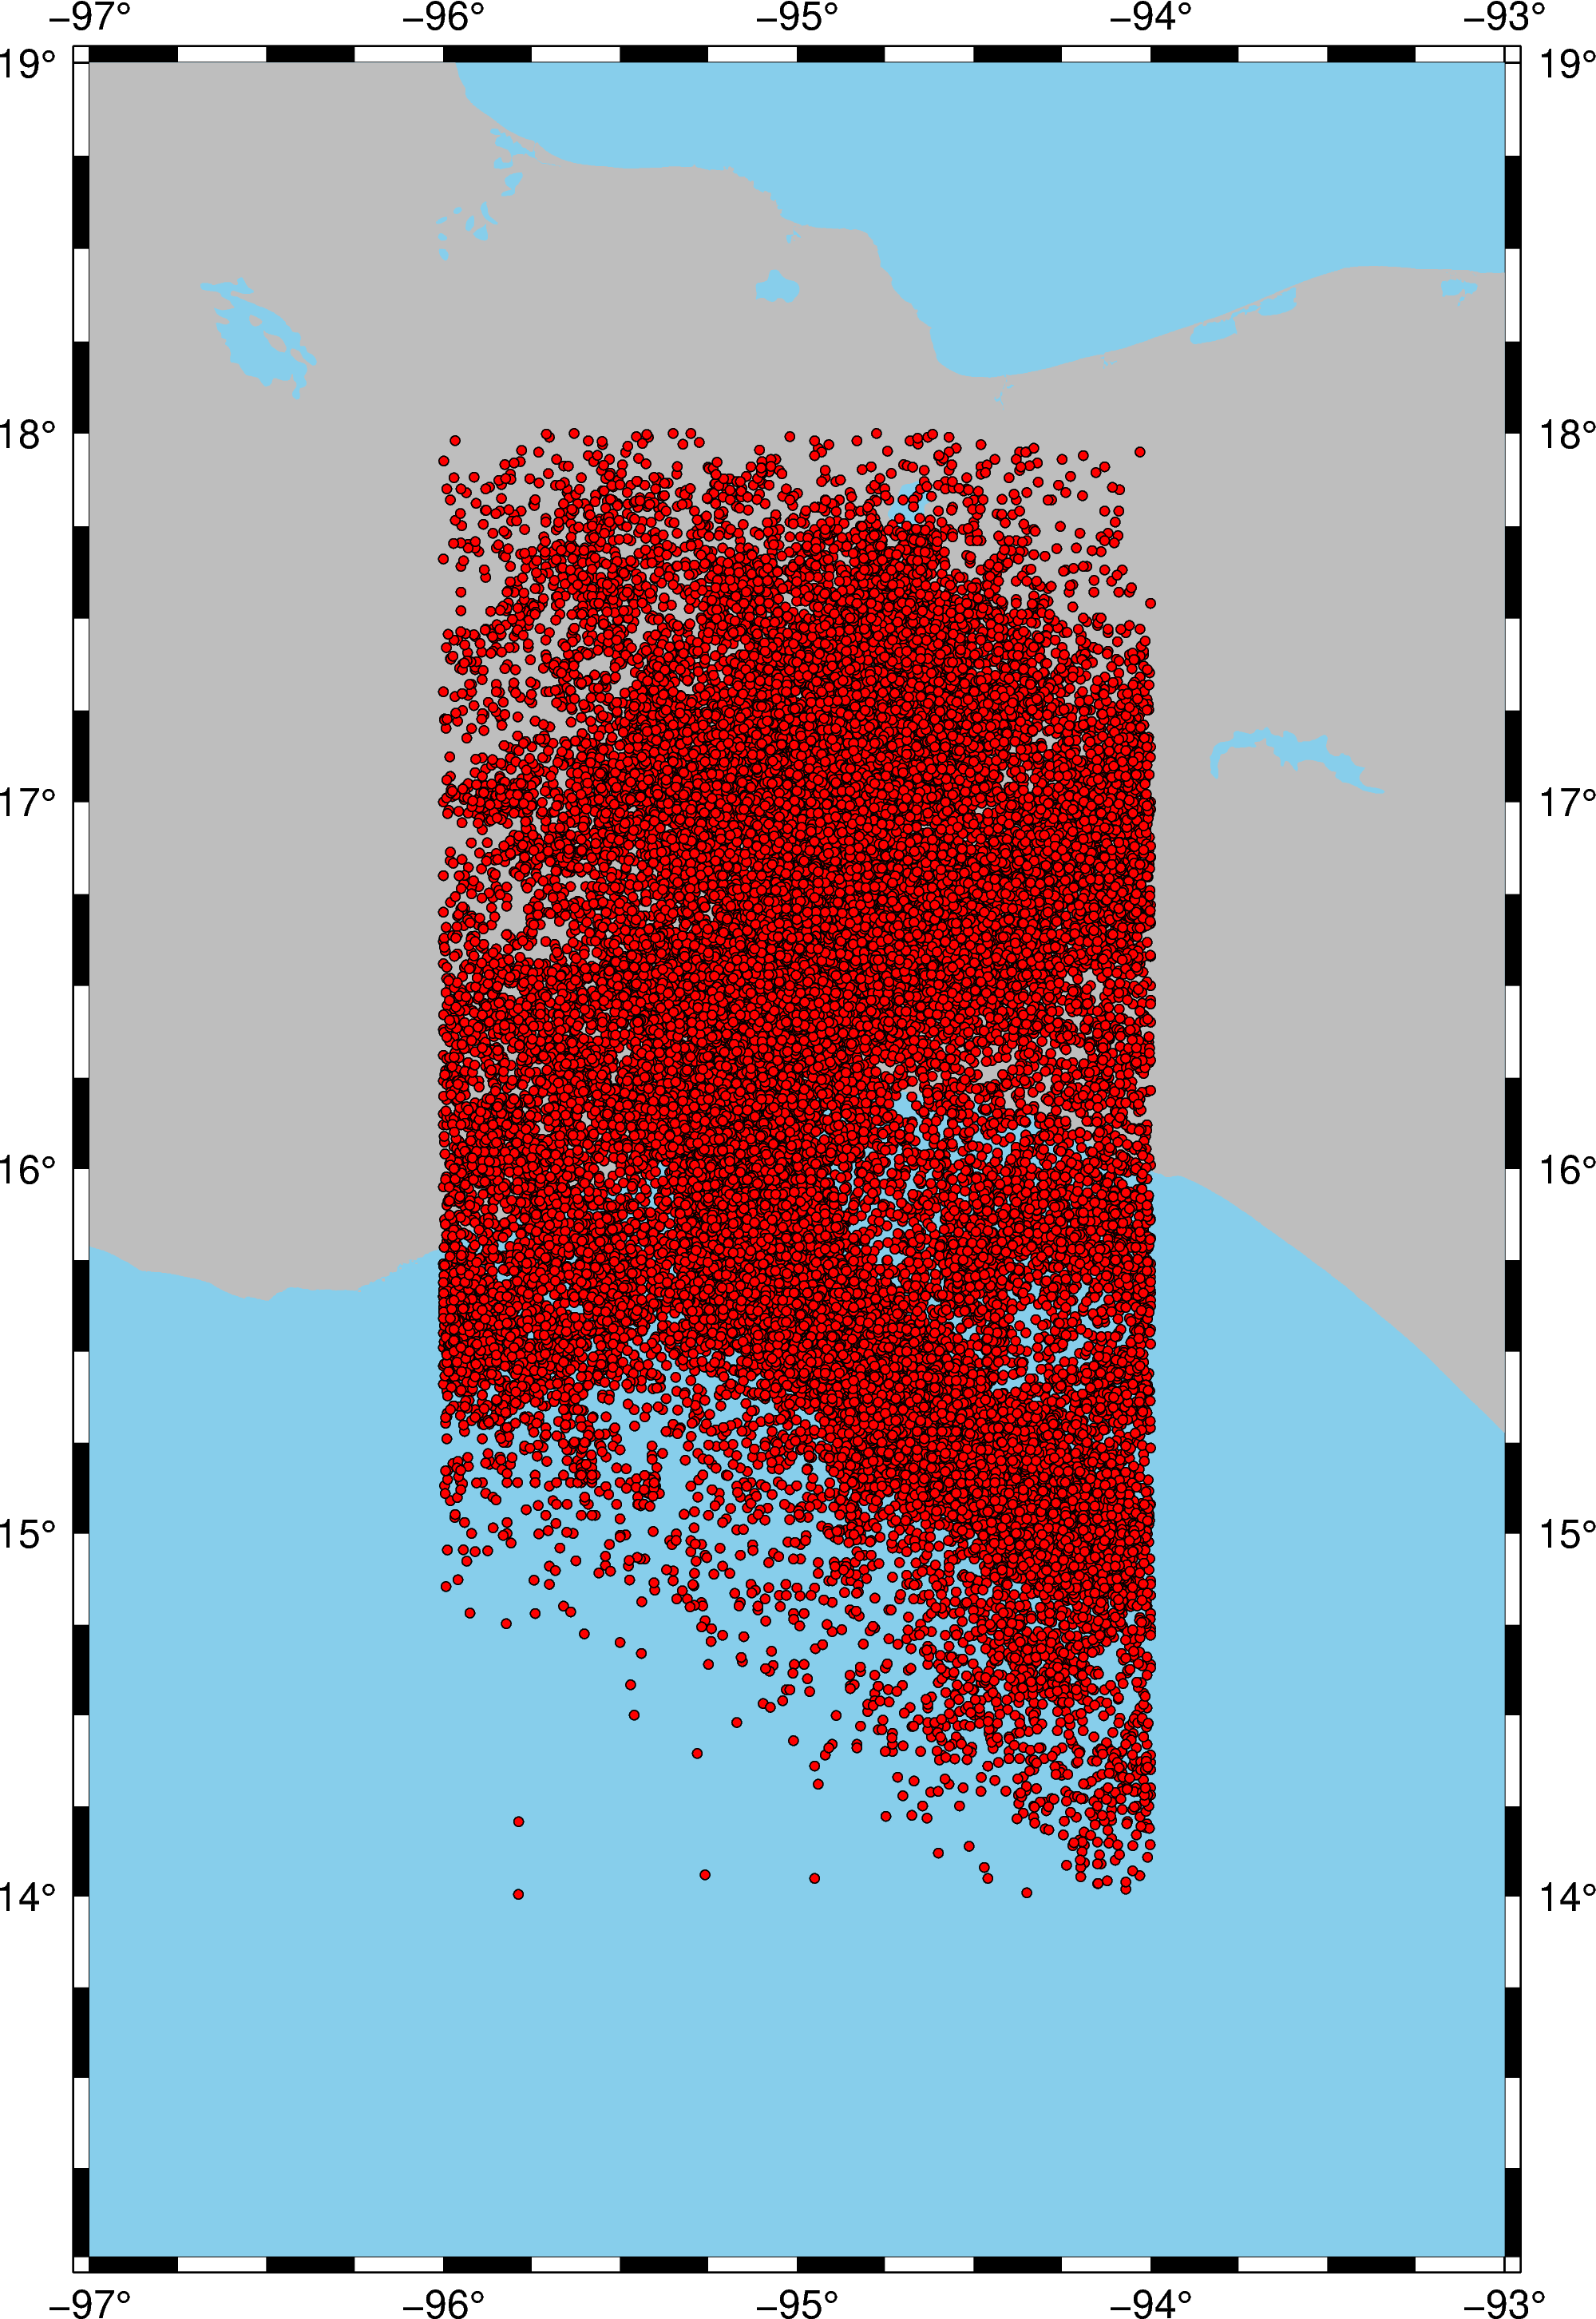

In [13]:
fig = pygmt.Figure()
fig.basemap(region=region, projection="M15c", frame=True)
fig.coast(land="gray", water="skyblue")
fig.plot(x=df.Longitude, y=df.Latitude, style="c0.1c", color="red", pen="black")
fig.show()

### Relation Magnitude and depth

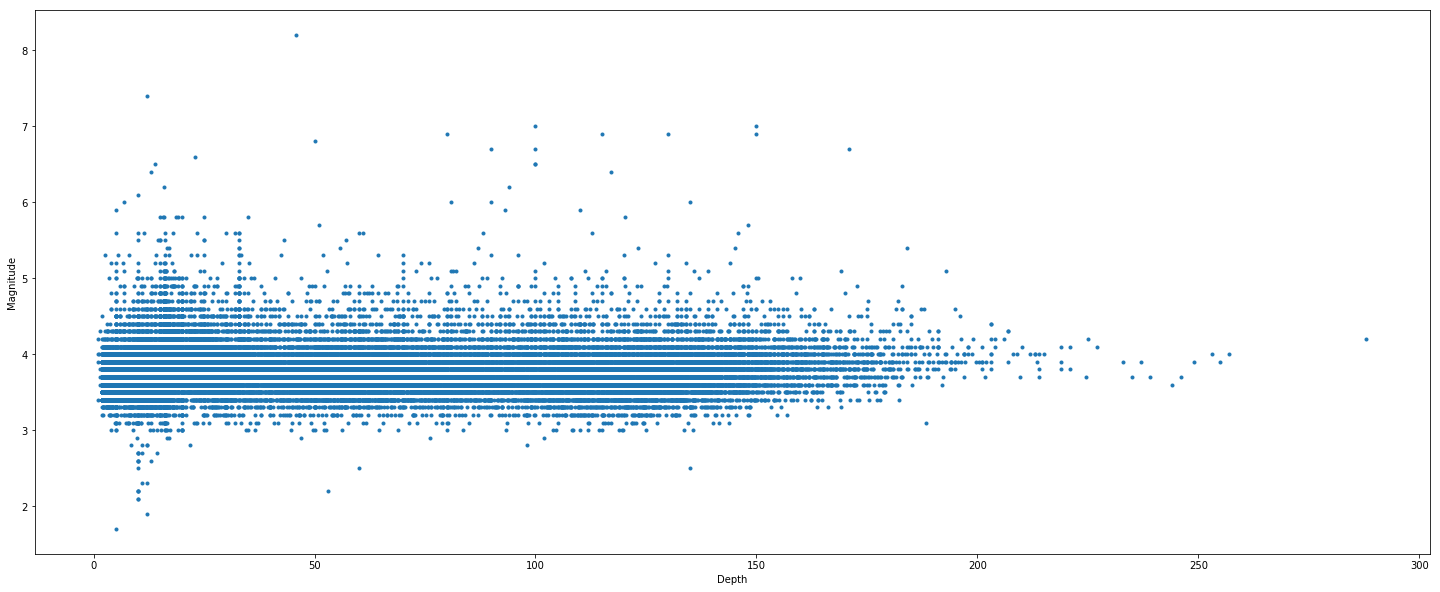

In [5]:
fig = plt.figure()
fig.set_size_inches(25, 10)
plt.plot(df.Deth, df.Magnitude, ".");
plt.ylabel("Magnitude");
plt.xlabel("Depth")
plt.show()

In this plot, we can visualize the relation between magnitude and depth. We can observe the majority of earthquakes occur in the first 250 km and have magnitudes between 3 to 5 with some large earthquakes.

### Crooss-section: Zone of sucduction

For better visualization of the occurs in this part of the subduction zone and see how the Cocos plate subduces down North America plate. We are going to create a plot of a cross-section to visualize the epicenters of earthquakes that permit us to obtain a good image of the dynamic of the process.

In [6]:
#We used Fetch Event script to obtain the better data for this objective
os.system('FetchEvent --lon -94.5:-94 --lat 14:18 --mag 4:10 -o th.eve')

65280

In [7]:
#we save the data in df object
df = pd.read_csv("th.eve",sep="|",header=None)

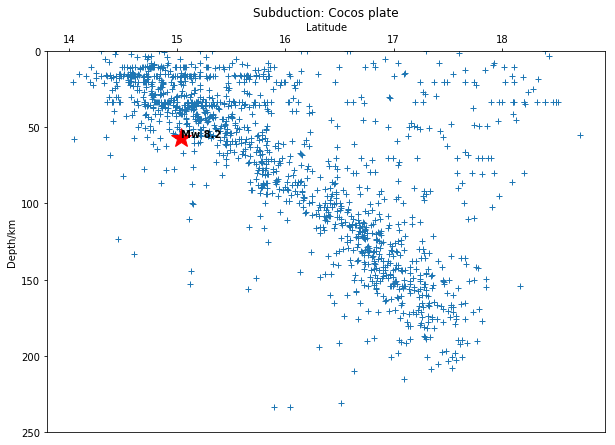

In [8]:
#setig of cross section
fig = plt.figure(figsize=(10,7))
plt.plot(df[2], df[4], '+')
plt.plot(15.0356, 56.67, "*", color="red", markersize=20)
plt.text(15.0356, 56.67, "Mw 8.2",weight="bold")
plt.xlabel('Latitude')
plt.ylabel('Depth/km')
plt.ylim(250, 0)
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position("top")
plt.title("Subduction: Cocos plate") 
plt.show()

This is an excellent visualization that occurs in the gap of Tehuantepec. Where the cocos plate moves down the Norteamerica plate by the first 200 km. After this distance occurs a melting process where the solid rock transforms into lava and the break of the plate stops and some little events can appear. 

### 3D VISUALIZATION  OF EARTHQUAKES

We can also generate a plot of our data in a 3D visualization. This permits obtaining a good visualization of the events and seeing some more details of the earthquakes.

In [3]:
f  =  pd.read_csv("eqks_plot.txt",sep="|",header=None)
print(f.head(5))
lat = f[2]
lon = f[3]
depth = f[4]
times = [] 
mags  = [] 

            0    1      2      3      4
0  1910-09-24  6.9  16.77 -95.90   80.0
1  1911-08-27  6.7  17.00 -96.00  100.0
2  1916-06-02  7.0  17.50 -95.00  150.0
3  1942-11-12  6.7  17.25 -94.25   90.0
4  1946-06-07  6.5  16.50 -94.00  100.0


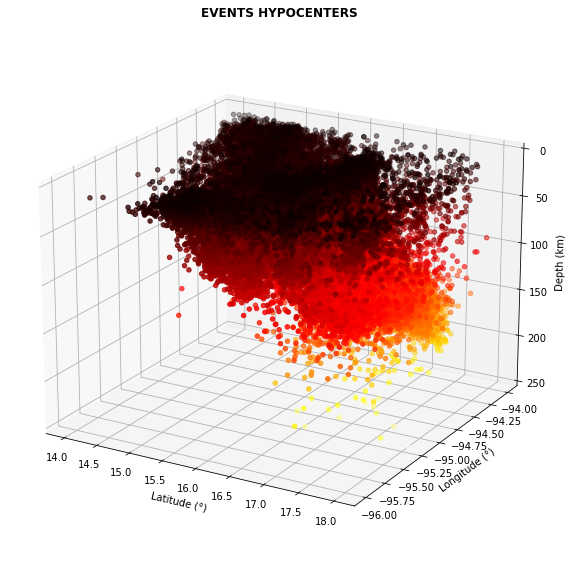

In [4]:
#setup of the plot 3D
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(projection='3d')
ax1.invert_zaxis()
ax1.set_xlabel('Latitude (°)')
ax1.set_ylabel('Longitude (°)')
ax1.set_zlabel('Depth (km)')
ax1.set_zlim(250,0)
ax1.set_title("EVENTS HYPOCENTERS", weight="bold")
ax1.scatter(lat, lon, depth, c=depth, cmap="hot")
ax1.view_init(20)
plt.show()

## EARTHQUAKE OF TEHUANTEPEC Mw 8.2

The Mw8.2 earthquake that occurred in the Gulf of Tehuantepec has been the largest earthquake in Mexico since 1932 where an earthquake near the coast of Colima and Jalisco of magnitude 8.2 was recorded.  

<img src=https://upload.wikimedia.org/wikipedia/commons/5/58/Intensidad_del_terremoto_en_Chiapas%2C_M%C3%A9xico%2C_2017.png>

In this section we are going to analizy the signal of the earthquake occurred in Tehuantepec on 2017-09-08 at 04:49:20.  

#### Setting search parameters

In [11]:
network  = "MX"
station  = "TLIG"
location = ""
channel  = "BHE"
client   = Client("IRIS")
startt  = UTCDateTime("2017-09-08T04:49:20")
endt    = UTCDateTime("2017-09-08T04:59:20")
st = client.get_waveforms(network, station, location, channel, startt, endt)
st

1 Trace(s) in Stream:
MX.TLIG..BHE | 2017-09-08T04:49:20.003393Z - 2017-09-08T04:59:19.953393Z | 20.0 Hz, 12000 samples

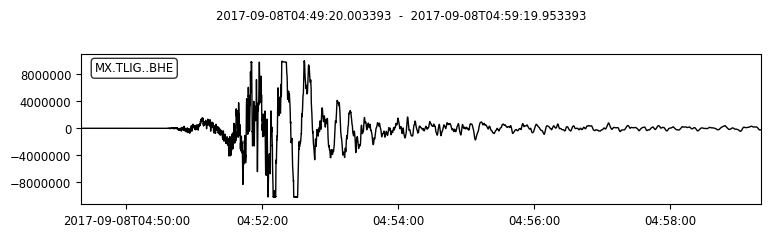

In [12]:
tr = st[0]
fig = tr.plot()

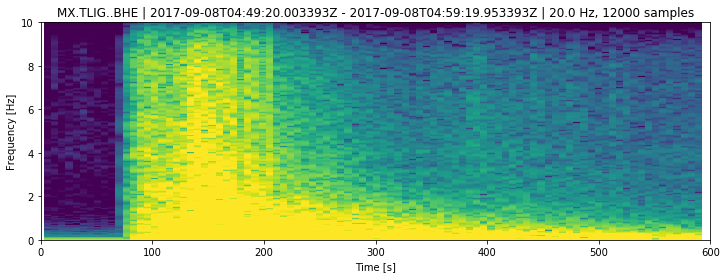

In [13]:
plt.rcParams['figure.figsize'] = (12, 4)
fig = tr.spectrogram(show=False, per_lap=.5, wlen=10, dbscale=True)
ax = fig.axes[0]
ax.set_ylim(0, 10) 
im = ax.images[0] 
im.set_clim(vmin=10, vmax=100)

Analyzing the contents of the signal we can appreciate a strong pulse of energy before one hundred seconds that corresponds to the arrival of the waves in the station. It is a higher pulse of energy with a frequency of 10 Hz between 50 to 200 seconds after this time occurs a decrease of the energy of this signal has a frequency minor than 1 Hz.

#### AFTERSHOCKS
Now, we are going to investigate how the seismicity rate changed in the days after up to the mainshock.   

#### PARAMETERS OF SEARCHING

In [14]:
startt = UTCDateTime("2017-09-08T04:49:20") 
endt   = UTCDateTime("2017-09-25T00:00:20")

maxrad = 1.0
lat = 15.0356
lon = -93.9067
minmag = 2.0

In [15]:
cat = client.get_events(starttime=startt, endtime=endt, latitude=lat, longitude=lon, maxradius=maxrad, minmagnitude=minmag, catalog="NEIC PDE")

In [16]:
print(cat)

223 Event(s) in Catalog:
2017-09-24T23:29:30.220000Z | +15.573,  -94.476 | 4.7 Mwr
2017-09-24T12:41:46.900000Z | +15.016,  -94.050 | 4.0 mb
...
2017-09-08T05:01:33.100000Z | +15.175,  -94.271 | 5.7 mb
2017-09-08T04:49:20.000000Z | +15.036,  -93.907 | 8.1 Mww
To see all events call 'print(CatalogObject.__str__(print_all=True))'


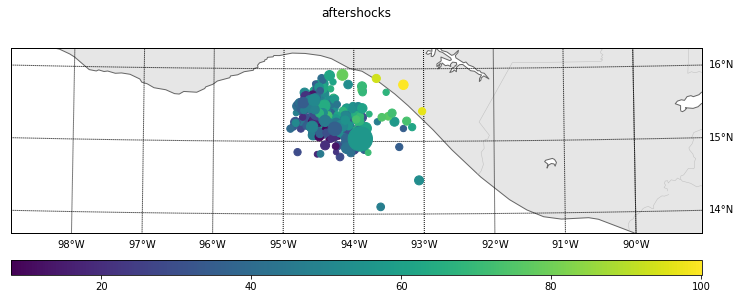

In [17]:
cat.plot(projection='local', resolution='i', title='Distribution of Aftershocks')
plt.show()

In this map we can see the distribution of the seismicity in the 23 days after the mainshock.  

In [18]:
times = []
mags = []
for event in cat:
    times.append(event.origins[0].time.datetime)
    mags.append(event.magnitudes[0].mag)
mtimes = mdates.date2num(times)

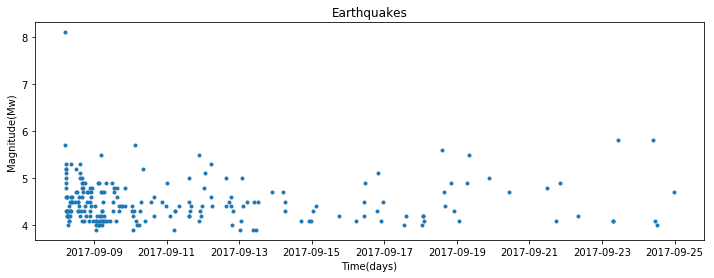

In [20]:
fig1 = plt.subplots(1,1)
plt.plot_date(mtimes,mags,marker='.')
plt.title('Earthquakes')
plt.xlabel('Time(days)')
plt.ylabel('Magnitude(Mw)')
plt.show()

In this plot, we can observe the change of magnitude over three weeks after the mainshock. Also, we watch a minor number of events just as time passes

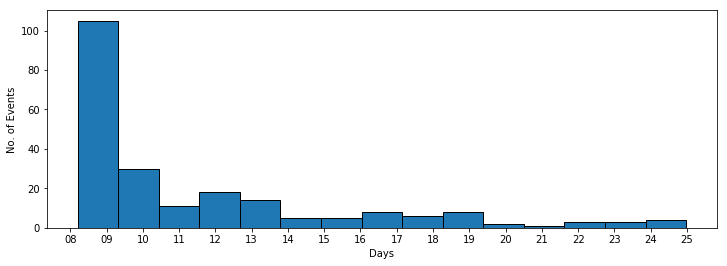

In [21]:
fig2, axes = plt.subplots(1,1)
axes.set(xlabel="Days",
        ylabel="No. of Events")
axes.hist(mtimes, bins=15, edgecolor='black')
axes.xaxis.set_major_locator(mdates.DayLocator())
axes.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
plt.show()

In this plot, we can observe the frequency of earthquakes over time and appreciate how the number of events quickly decrease in the first days according to the catalog requested. 

## Acknowledgments

I want to express my gratitude to all the team that did possible offer this workshop and to teach new skills for students around the world.  

In special for Dr. Michael Hubental, Dr. Mike Brudzinsky, Ph.D. Shannon Fasola, and Ph.D. Gillian Goldhagen for support and help over the workshop. 